<a href="https://colab.research.google.com/github/hwansoo1981/ai/blob/master/GroupA_PowerGrid_wo_inflation_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd    # pandas for data sheet
import numpy as np    # numpy for numerical computation
import matplotlib.pyplot as plt    # draw for plot
import seaborn as sns                  # draw for plot
from matplotlib import rcParams # draw for plot
import scipy.stats as st     # scipy for scientific computation
import itertools                 # itertools for iteration preprocessing

In [0]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y.%m.%d')

# For Google Drive
#df_pg = pd.read_csv("https://drive.google.com/uc?export=download&id=1R8N2_7ggwzttLtyLqCrf2ng4HeQ7BlHs", parse_dates=['date'], index_col='date',date_parser=dateparse)

# For Github
df_pg = pd.read_csv("https://raw.githubusercontent.com/hwansoo1981/dataset/master/groupA%2020190718%20V5.csv", parse_dates=['Date'], index_col='Date',date_parser=dateparse)


In [3]:
print(df_pg.shape)
print(df_pg.nunique())

(132, 6)
Total                 131
Income_per_capita      11
Installed_capacity     10
Mean_Air_Temp         108
Max_Air_Temp          104
Min_Air_Temp          110
dtype: int64


In [4]:
print(df_pg.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2008-01-01 to 2018-12-01
Data columns (total 6 columns):
Total                 132 non-null int64
Income_per_capita     132 non-null float64
Installed_capacity    132 non-null int64
Mean_Air_Temp         132 non-null float64
Max_Air_Temp          132 non-null float64
Min_Air_Temp          132 non-null float64
dtypes: float64(4), int64(2)
memory usage: 7.2 KB
None


In [5]:
df_pg.head()

,Total,Income_per_capita,Installed_capacity,Mean_Air_Temp,Max_Air_Temp,Min_Air_Temp
Date,,,,,,
2008-01-01,35129,16444.02075,72491,-1.7,7.3,-11.1
2008-02-01,34178,16444.02075,72491,-1.2,10.5,-10.1
2008-03-01,33294,16444.02075,72491,7.3,19.8,-1.7
2008-04-01,31705,16444.02075,72491,14.1,28.0,3.8
2008-05-01,30120,16444.02075,72491,17.7,28.5,8.1


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time series data for power consumption')

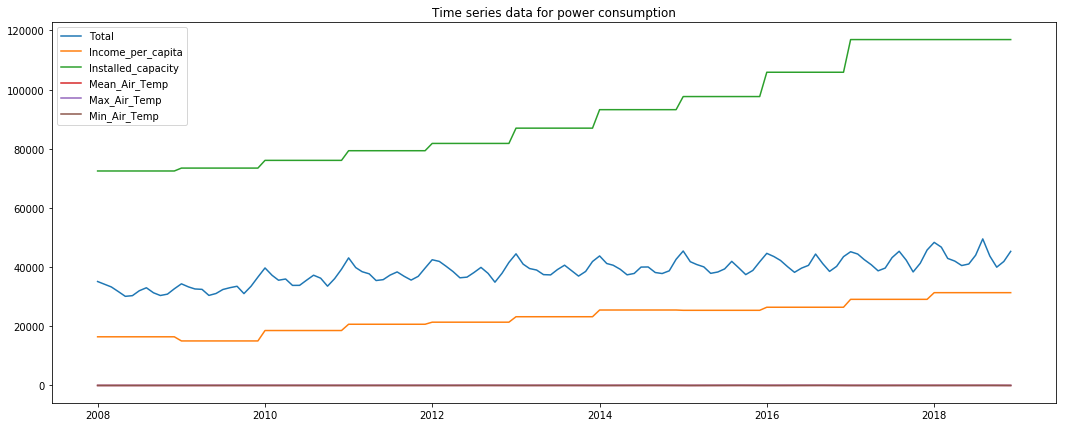

In [6]:
plt.figure(figsize=(18,7))
plt.plot(df_pg['Total'])
plt.plot(df_pg['Income_per_capita'])
plt.plot(df_pg['Installed_capacity'])
plt.plot(df_pg['Mean_Air_Temp'])
plt.plot(df_pg['Max_Air_Temp'])
plt.plot(df_pg['Min_Air_Temp'])

plt.legend()
plt.title('Time series data for power consumption')

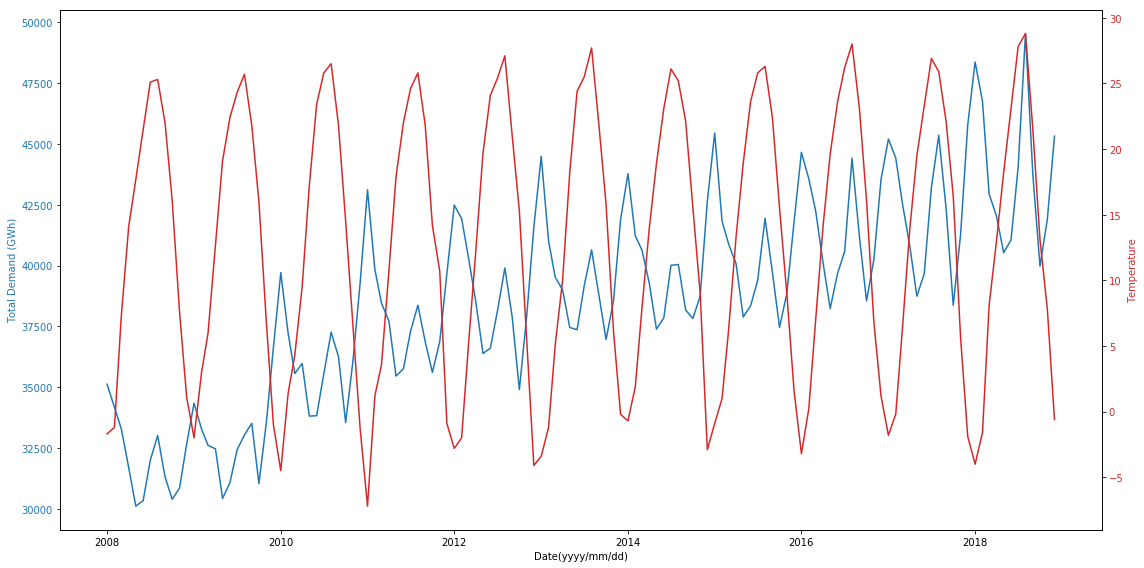

In [7]:
fig, ax1 = plt.subplots(figsize=(16,8))

color = 'tab:blue'
ax1.set_xlabel('Date(yyyy/mm/dd)')
ax1.set_ylabel('Total Demand (GWh)', color=color)
ax1.plot(df_pg['Total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(df_pg['Mean_Air_Temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

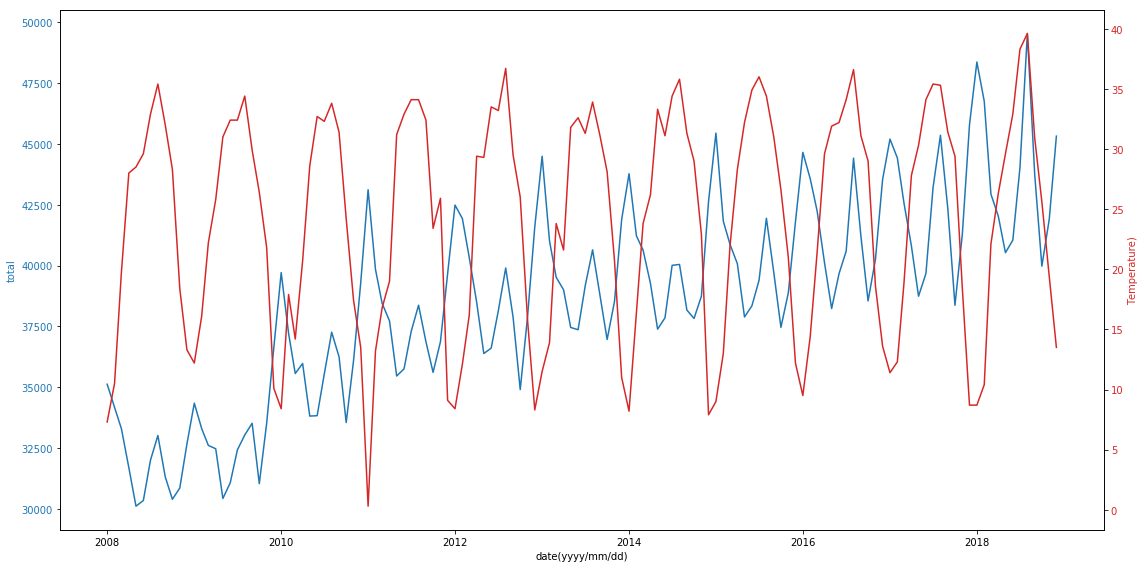

In [8]:
fig, ax1 = plt.subplots(figsize=(16,8))

color = 'tab:blue'
ax1.set_xlabel('date(yyyy/mm/dd)')
ax1.set_ylabel('total', color=color)
ax1.plot(df_pg['Total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Temperature)', color=color)  # we already handled the x-label with ax1
ax2.plot(df_pg['Max_Air_Temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

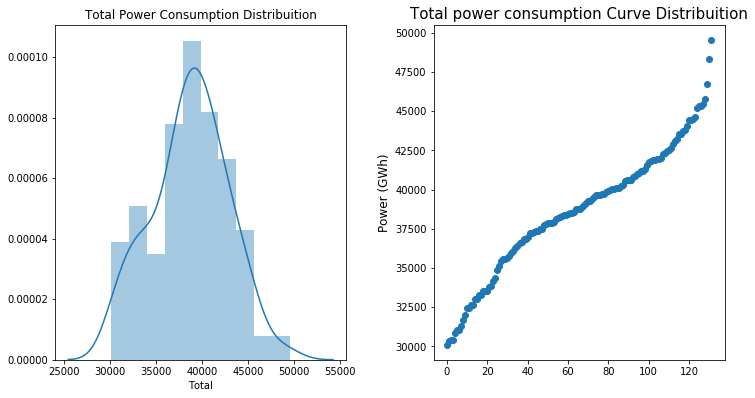

In [9]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Total Power Consumption Distribuition')
sns.distplot(df_pg['Total'])

plt.subplot(122)
g1 = plt.scatter(range(df_pg.shape[0]), np.sort(df_pg.Total.values))
g1 = plt.title("Total power consumption Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Power (GWh)", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()


In [10]:
print("Total Min")
print(df_pg['Total'].min())
print("Total Mean")
print(df_pg['Total'].mean())
print("Total Median")
print(df_pg['Total'].median())
print("Total Max")
print(df_pg['Total'].max())
print("Total Std")
print(df_pg['Total'].std())

Total Min
30120
Total Mean
38654.51515151515
Total Median
38763.0
Total Max
49532
Total Std
4129.0047808987465


<Figure size 576x360 with 0 Axes>

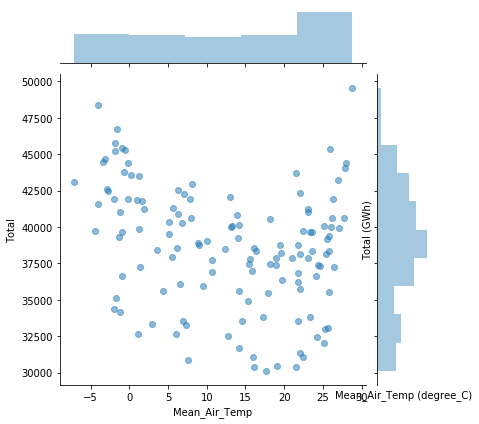

In [11]:
plt.figure(figsize = (8, 5))
sns.jointplot(df_pg.Mean_Air_Temp, df_pg.Total, 
              alpha = 0.5)
plt.xlabel('Mean_Air_Temp (degree_C)')
plt.ylabel('Total (GWh)')
plt.show()

<Figure size 576x360 with 0 Axes>

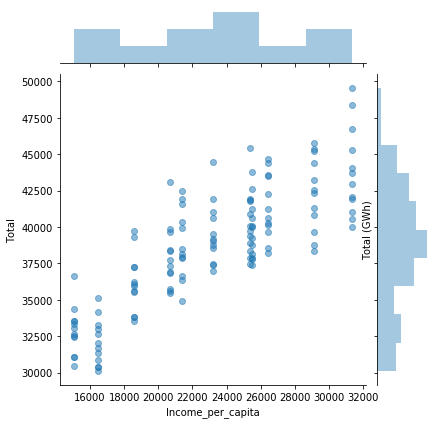

In [12]:
plt.figure(figsize = (8, 5))
sns.jointplot(df_pg.Income_per_capita, df_pg.Total, 
              alpha = 0.5)
plt.xlabel('')
plt.ylabel('Total (GWh)')
plt.show()

# Correlation Matrix

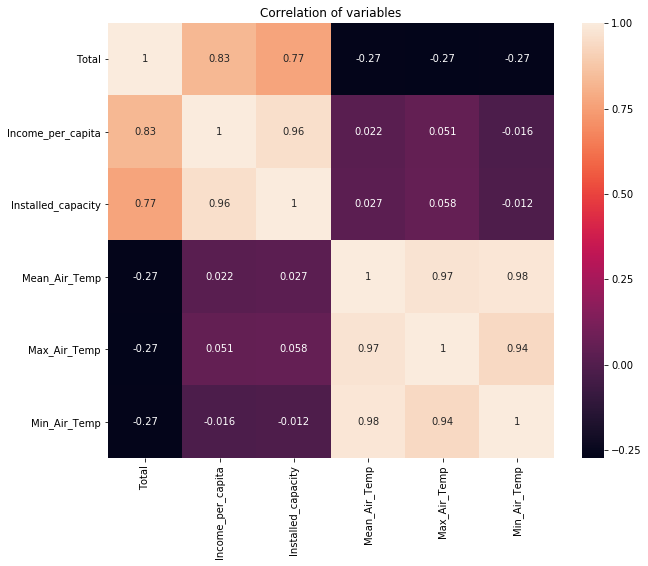

In [13]:
corr = df_pg[['Total', 'Income_per_capita', 'Installed_capacity', 'Mean_Air_Temp', 'Max_Air_Temp', 'Min_Air_Temp']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

In [0]:
########################################################
######## IMPORTING NECESSARY MODULES AND MODELS ########
########################################################

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, TimeSeriesSplit # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [16]:
num_samples = df_pg.shape[0]
window_size = 12 
num_splits = num_samples - window_size

print (num_samples, num_splits)
tss = TimeSeriesSplit(n_splits=num_splits, max_train_size=1)


132 120


In [17]:
X = df_pg.drop("Total" ,axis=1).values
#X = df_pg(["income_per_capita","Mean_Air_Temp","Max_Air_Temp","Min_Air_Temp"]).values
y = df_pg["Total"].values

X_train = []
X_test = []
y_train = []
y_test = []

for train_index, test_index in tss.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_loopback = []
  X_test_loopback = []
  for i in range(1, window_size):
    X_train_loopback.append(X[train_index - i].reshape(-1))
    X_test_loopback.append(X[test_index - i].reshape(-1))
    
  
  X_train.append(np.concatenate(X_train_loopback).ravel())
  y_train.append(y[train_index].reshape(-1))
  X_test.append(np.concatenate(X_test_loopback).ravel())
  y_test.append(y[test_index].reshape(-1))

TRAIN: [11] TEST: [12]
TRAIN: [12] TEST: [13]
TRAIN: [13] TEST: [14]
TRAIN: [14] TEST: [15]
TRAIN: [15] TEST: [16]
TRAIN: [16] TEST: [17]
TRAIN: [17] TEST: [18]
TRAIN: [18] TEST: [19]
TRAIN: [19] TEST: [20]
TRAIN: [20] TEST: [21]
TRAIN: [21] TEST: [22]
TRAIN: [22] TEST: [23]
TRAIN: [23] TEST: [24]
TRAIN: [24] TEST: [25]
TRAIN: [25] TEST: [26]
TRAIN: [26] TEST: [27]
TRAIN: [27] TEST: [28]
TRAIN: [28] TEST: [29]
TRAIN: [29] TEST: [30]
TRAIN: [30] TEST: [31]
TRAIN: [31] TEST: [32]
TRAIN: [32] TEST: [33]
TRAIN: [33] TEST: [34]
TRAIN: [34] TEST: [35]
TRAIN: [35] TEST: [36]
TRAIN: [36] TEST: [37]
TRAIN: [37] TEST: [38]
TRAIN: [38] TEST: [39]
TRAIN: [39] TEST: [40]
TRAIN: [40] TEST: [41]
TRAIN: [41] TEST: [42]
TRAIN: [42] TEST: [43]
TRAIN: [43] TEST: [44]
TRAIN: [44] TEST: [45]
TRAIN: [45] TEST: [46]
TRAIN: [46] TEST: [47]
TRAIN: [47] TEST: [48]
TRAIN: [48] TEST: [49]
TRAIN: [49] TEST: [50]
TRAIN: [50] TEST: [51]
TRAIN: [51] TEST: [52]
TRAIN: [52] TEST: [53]
TRAIN: [53] TEST: [54]
TRAIN: [54]

In [18]:
print (X_train[13], y_train[13])

[ 1.50457116e+04  7.34700000e+04 -1.00000000e+00  1.01000000e+01
 -1.29000000e+01  1.50457116e+04  7.34700000e+04  6.90000000e+00
  2.18000000e+01 -4.30000000e+00  1.50457116e+04  7.34700000e+04
  1.60000000e+01  2.64000000e+01  6.20000000e+00  1.50457116e+04
  7.34700000e+04  2.18000000e+01  2.99000000e+01  1.44000000e+01
  1.50457116e+04  7.34700000e+04  2.57000000e+01  3.44000000e+01
  1.64000000e+01  1.50457116e+04  7.34700000e+04  2.43000000e+01
  3.24000000e+01  1.87000000e+01  1.50457116e+04  7.34700000e+04
  2.24000000e+01  3.24000000e+01  1.43000000e+01  1.50457116e+04
  7.34700000e+04  1.91000000e+01  3.10000000e+01  9.80000000e+00
  1.50457116e+04  7.34700000e+04  1.27000000e+01  2.58000000e+01
  2.20000000e+00  1.50457116e+04  7.34700000e+04  6.00000000e+00
  2.22000000e+01 -3.30000000e+00  1.50457116e+04  7.34700000e+04
  2.90000000e+00  1.61000000e+01 -8.60000000e+00] [39713]


In [19]:
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

[14:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

In [21]:
#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

Scaled_Ridge: 0.297680 (+/- 0.765710)
Scaled_Lasso: 0.262053 (+/- 0.315572)
Scaled_Elastic: 0.154239 (+/- 0.722948)
Scaled_SVR: 0.186849 (+/- 0.940468)
Scaled_RF_reg: 0.007855 (+/- 1.355048)
Scaled_ET_reg: -0.011139 (+/- 1.504071)
Scaled_BR_reg: -0.038657 (+/- 1.269317)
Scaled_Hub-Reg: 0.127456 (+/- 1.030921)
Scaled_BayRidge: 0.320856 (+/- 0.766594)
Scaled_XGB_reg: 0.268314 (+/- 0.866897)
Scaled_DT_reg: -0.217168 (+/- 1.119707)
Scaled_KNN_reg: 0.094219 (+/- 1.286024)
Scaled_Gboost-Reg: 0.235806 (+/- 0.899388)
Scaled_RFR_PCA: 0.219734 (+/- 0.953011)
Scaled_XGBR_PCA: 0.369813 (+/- 0.694435)


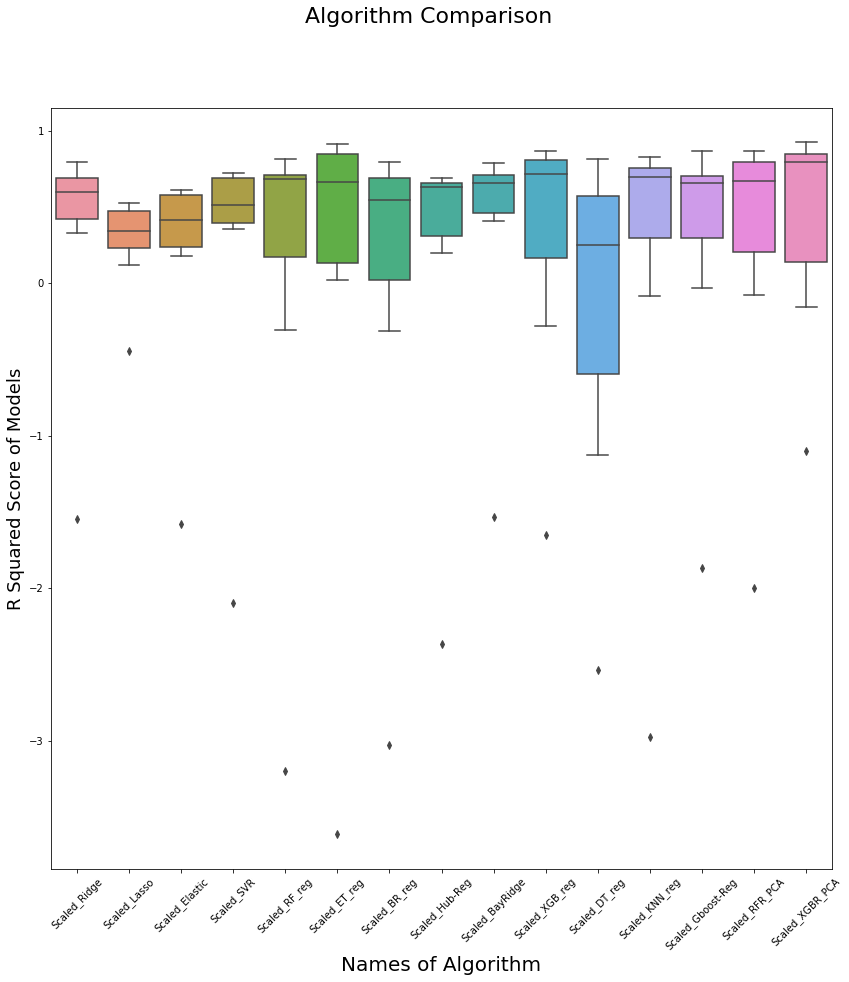

In [33]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(14,14))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Names of Algorithm", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# Testing the best models

In [0]:
#xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False,
        copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
        n_iter=300, normalize=False, tol=0.001, verbose=False)

In [35]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [36]:
y_hat = xgb.predict(X_test)
xgb.score(X_test,y_test)

0.7239526715794149

In [37]:
new_output = xgb.predict([ 3.66350000e+04,  1.82919196e+04 , 7.34700000e+04 , 1.01000000e+01,
 -1.29000000e+01,  3.35310000e+04,  1.82919196e+04,  7.34700000e+04,
  2.18000000e+01, -4.30000000e+00,  3.10440000e+04,  1.82919196e+04,
  7.34700000e+04 , 2.64000000e+01,  6.20000000e+00,  3.35250000e+04,
  1.82919196e+04,  7.34700000e+04,  2.99000000e+01,  1.44000000e+01,
  3.30440000e+04,  1.82919196e+04,  7.34700000e+04,  3.44000000e+01,
  1.64000000e+01,  3.24310000e+04,  1.82919196e+04,  7.34700000e+04,
  3.24000000e+01,  1.87000000e+01,  3.10790000e+04,  1.82919196e+04,
  7.34700000e+04,  3.24000000e+01,  1.43000000e+01,  3.04360000e+04,
  1.82919196e+04,  7.34700000e+04,  3.10000000e+01,  9.80000000e+00,
  3.24780000e+04,  1.82919196e+04,  7.34700000e+04,  2.58000000e+01,
  2.20000000e+00,  3.26150000e+04,  1.82919196e+04,  7.34700000e+04,
  2.22000000e+01, -3.30000000e+00,  3.33060000e+04,  1.82919196e+04,
  7.34700000e+04,  1.61000000e+01, -8.60000000e+00] )
print (new_output)

ValueError: ignored

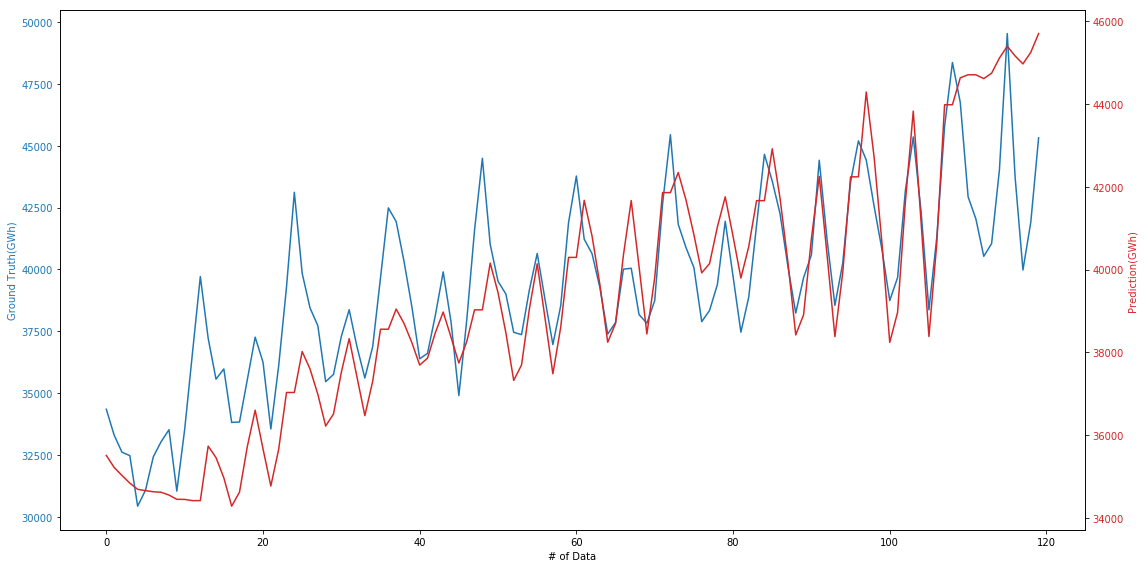

In [38]:
fig, ax1 = plt.subplots(figsize=(16,8))

color = 'tab:blue'
ax1.set_xlabel('# of Data')
ax1.set_ylabel('Ground Truth(GWh)', color=color)
ax1.plot(y_test, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Prediction(GWh)', color=color)  # we already handled the x-label with ax1
ax2.plot(y_hat, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Randomized Search in RandomForest Regressor


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## Using Random Search to find the best Hyper Paramns

In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   29.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [41]:
#Knowning the best params
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 94}

In [0]:
# Predicting with best params
y_hat_Search = rf_random.predict(X_test)

In [43]:
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, y_test),4)))
print("\nMSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

XGBoost Regressor R2-score: 0.5959
RandomForest Regressor Prediction R2-score: 0.9465

MSE of XGBoost Regressor: 885.156832889752
MSE of RandomForest Regressor: 354.92178431792854 


### [END_OF_FILE]